# Exploratory Data Analysis of NYC Flight Data

In [1]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/UpX-Academy/DataAnalyticsWithPython/Project/Project_1_NYC-Flight_Data/')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Read the NYC Flight Data File

In [3]:
Flight_Data = pd.read_csv('dataset/flight_data.csv')
Flight_Data['flight_no'] = Flight_Data['carrier'] + Flight_Data['flight'].astype(str)
display(Flight_Data.tail(2))
Flight_Data.shape

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,flight_no
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00,MQ3572
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,30-09-2013 08:00,MQ3531


(336776, 20)

In [4]:
display(round(Flight_Data.describe().T, 2))
Flight_Data.isnull().sum()

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.00,0.00,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.55,3.41,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.71,8.77,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.11,488.28,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.25,467.34,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.64,40.21,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.05,533.26,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.38,497.46,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.90,44.63,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.92,1632.47,1.0,553.0,1496.0,3465.0,8500.0


year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
flight_no            0
dtype: int64

#### Inferences:<BR>
1. dep_time: The data appears to follow normal distribution, The mean is approx in the middle of min and max value and the IQR is also evenly distributed. However, the standard deviation is more <BR>
2. dep_delay: The standard deviation seems to be very large with respect to mean and  skewness is +ve. It also appears that there are outliers. This should be investigated more. <br>
3. arr_delay: Here again, skewness is +ve and there seems to be outliers present.This is following the same pattern as dep_delay<br>
4. distance: The data seems to be normally distributed but the max value is large compared to mean, hinting at possible outliers<br>
5. NaN: approx 2.65% data is having null values 5 relevant columns(tailnum is not relevant). This needs to be dealth with

## Filling the NaN Values
The NaN values will be filled the the following manner: 
1. dep_time: Fill the NaN values with sched_dep_time + mean dep_delay of the <B>respective airlines</B> <br>
2. dep_delay: Fill the NaN values with mean dep_delay of the <B>respective airlines</B> <br>
3. arr_time: Fill the NaN values with sched_arr_time + mean arr_delay of the <B>respective airlines</B> <br>
4. arr_delay: Fill the NaN values with sched_arr_time + mean arr_delay of the <B>respective airlines</B> <br>
5. air_time: Fill NaN values with forward fill method

In [5]:
# We first fill fill the dep_delay and arr_delay NaN values
carrier = Flight_Data.carrier.unique()
carrier_dict = {}

for i in carrier:
    carrier_dict[i] = round(Flight_Data.loc[Flight_Data.carrier == i].dep_delay.mean(),0)

Flight_Data.dep_delay.fillna(Flight_Data.carrier.map(carrier_dict), inplace = True)

# We now fill the arr_time and sched_arr_time NaN values
carrier_dict = {}

for i in carrier:
    carrier_dict[i] = round(Flight_Data.loc[Flight_Data.carrier == i].arr_delay.mean(), 0)

Flight_Data.arr_delay.fillna(Flight_Data.carrier.map(carrier_dict), inplace = True)
Flight_Data.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay            0
arr_time          8713
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
flight_no            0
dtype: int64

In [6]:
average_dep_delay = round(Flight_Data[['carrier', 'dep_delay']].groupby('carrier').agg([np.mean]), 2).astype(int)
average_dep_delay.columns = ['dep_delay']

#Write the function to return time for dep_time column
def fill_dep_time(x):
    dep_time = x['sched_dep_time'] + average_dep_delay.loc[x['carrier'], 'dep_delay']
        
    if(dep_time % 100 > 59):
        dep_time = dep_time + 40
    return dep_time

Flight_Data.dep_time = Flight_Data.apply(fill_dep_time, axis = 1)

average_arr_delay = round(Flight_Data[['carrier', 'arr_delay']].groupby('carrier').agg([np.mean]), 2).astype(int)
average_arr_delay.columns = ['arr_delay']

#Write the function to return time for arr_time column
def fill_arr_time(x):
    arr_time = x['sched_arr_time'] + average_arr_delay.loc[x['carrier'], 'arr_delay']
        
    if(arr_time % 100 > 59):
        arr_time = arr_time + 40
    return arr_time

Flight_Data.arr_time = Flight_Data.apply(fill_arr_time, axis = 1)

# Fill the air_time NaN values
Flight_Data.air_time = Flight_Data.groupby(['origin', 'dest'])['air_time'].fillna(method='ffill')
display(Flight_Data.tail())

Flight_Data.isnull().sum()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,flight_no
336771,2013,9,30,1511,1455,17.0,1641,1634,7.0,9E,3393,NaN,JFK,DCA,36.0,213,14,55,30-09-2013 14:00,9E3393
336772,2013,9,30,2216,2200,17.0,2319,2312,7.0,9E,3525,NaN,LGA,SYR,40.0,198,22,0,30-09-2013 22:00,9E3525
336773,2013,9,30,1220,1210,11.0,1340,1330,11.0,MQ,3461,N535MQ,LGA,BNA,97.0,764,12,10,30-09-2013 12:00,MQ3461
336774,2013,9,30,1209,1159,11.0,1354,1344,11.0,MQ,3572,N511MQ,LGA,CLE,62.0,419,11,59,30-09-2013 11:00,MQ3572
336775,2013,9,30,850,840,11.0,1030,1020,11.0,MQ,3531,N839MQ,LGA,RDU,60.0,431,8,40,30-09-2013 08:00,MQ3531


year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             5
distance             0
hour                 0
minute               0
time_hour            0
flight_no            0
dtype: int64

### Let us understand the correlation of various columns of the dataset

In [73]:
corr_dataset = Flight_Data[['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'air_time',\
                            'distance']]
corr_dataset.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance
dep_time,1.0,1.0,0.2,0.78,0.78,0.17,-0.024,-0.021
sched_dep_time,1.0,1.0,0.2,0.78,0.78,0.17,-0.02,-0.018
dep_delay,0.2,0.2,1.0,0.16,0.16,0.91,-0.023,-0.022
arr_time,0.78,0.78,0.16,1.0,1.0,0.13,0.067,0.062
sched_arr_time,0.78,0.78,0.16,1.0,1.0,0.13,0.074,0.069
arr_delay,0.17,0.17,0.91,0.13,0.13,1.0,-0.036,-0.063
air_time,-0.024,-0.02,-0.023,0.067,0.074,-0.036,1.0,0.99
distance,-0.021,-0.018,-0.022,0.062,0.069,-0.063,0.99,1.0


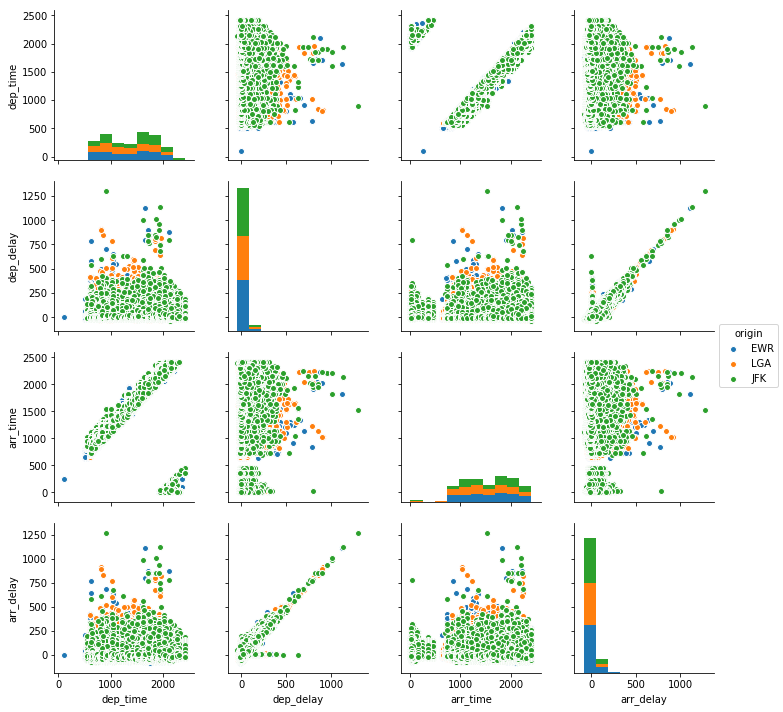

In [71]:
numeric_data = Flight_Data[['origin', 'flight_no', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay']]
sns.pairplot(numeric_data, hue= 'origin')
plt.show()

#### Inference
1. Arrival time and Departure Time is +vely correlated
2. Arrival Delay and Departure Delay are +vely correlated
3. JFK has the highest departure delays among the 3 airports

## Which airlines has fastest and slowest speed?

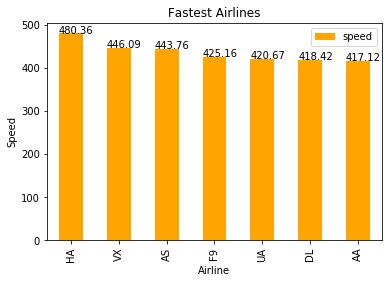

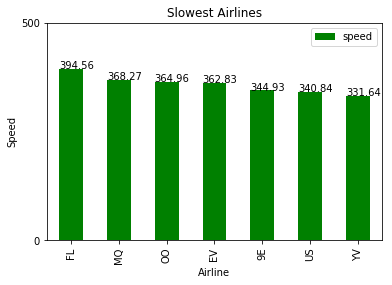

In [7]:
mean_speed = Flight_Data[Flight_Data.air_time.notnull()]
mean_speed['speed'] = mean_speed.distance/(mean_speed.air_time/60)
mean_speed = round(mean_speed.groupby('carrier')['carrier', 'speed'].mean(), 2).sort_values(by = 'speed', ascending = False)

ax = mean_speed.head(7).plot.bar(color = 'orange')
ax.set(xlabel="Airline", ylabel = "Speed", title = "Fastest Airlines")

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
    
ax = mean_speed.tail(7).plot.bar(color = 'green')
ax.set(xlabel="Airline", ylabel = "Speed", yticks = [0,500], title = "Slowest Airlines")

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
plt.show()

#mean_speed

#### Inference:
1. HA airline is the fastest with 480 MPH of average speed. The next 6 fastest airlines are VX, AS, F9, UA, DL and AA whose average speed is in the range of 446 to 417 MPH <br>
2. YV is the slowest airline with an average speed of 331 MPH.

## What is the pattern of delay of short, medium and long distance flights? 

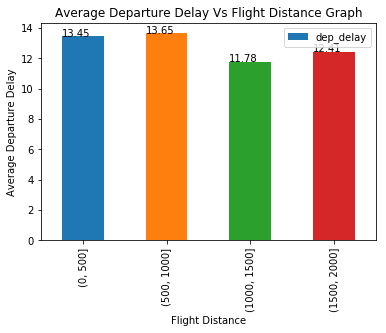

,distance_bin,dep_delay
0,"(0, 500]",13.45
1,"(500, 1000]",13.65
2,"(1000, 1500]",11.78
3,"(1500, 2000]",12.41


In [8]:
delay_short_med_long = Flight_Data[['flight_no', 'distance', 'dep_delay']]
# We devide the distance into 4 bins of 500 miles each
delay_short_med_long['distance_bin'] = pd.cut(Flight_Data.distance, [0, 500, 1000, 1500, 2000])
delay_short_med_long = round(delay_short_med_long.groupby('distance_bin').dep_delay.mean().reset_index(), 2)


ax = delay_short_med_long.plot.bar('distance_bin', 'dep_delay', linewidth = 5)
ax.set(xlabel = 'Flight Distance', ylabel = 'Average Departure Delay' , title = 'Average Departure Delay Vs Flight Distance Graph')
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))


plt.show()

delay_short_med_long

#### Inference
1. The departure delay of medium distance flights (1000 - 1500 miles) is the lowest (11.78 mins)
2. The departure delay of short distance flights (500 - 1000 miles) is the highest (13.65 mins)

## Which are the 5 best airlines in terms of arrival delays?

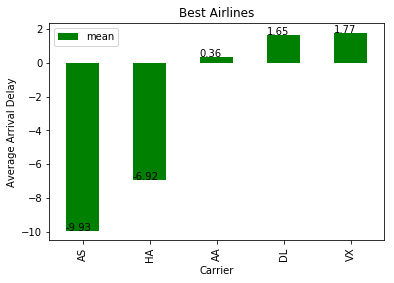

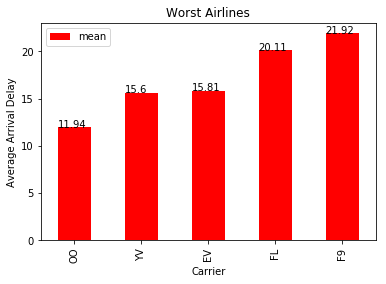

In [17]:
# Best airlines
avg_arrival_delay = round(Flight_Data.groupby('carrier')['arr_delay'].agg(['mean']), 2).sort_values('mean', ascending = True)
ax = avg_arrival_delay.head().plot(kind = 'bar', color = 'green')

ax.set(xlabel = 'Carrier', ylabel = 'Average Arrival Delay' , title = 'Best Airlines')
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))

ax = avg_arrival_delay.tail().plot(kind = 'bar', color = 'red')
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
ax.set(xlabel = 'Carrier', ylabel = 'Average Arrival Delay' , title = 'Worst Airlines')
plt.show()

#### Inference:
1. AS is the best airline in terms of arrival delays. Infact, they are 9.9 minutes before estimated arrival time <br>
2. HA airline is the 2nd best with approx 6.9 minutes before expected arrival time <br>
3. All other airlines have +ve average arrival delays but AA, DL and VX are relatively better
4. F9 is the worst airline in terms of arrival delays followed by FL, EV and YV

## What is the average departure delay of each airline at Origin? 

In [9]:
table1 = round(pd.pivot_table(Flight_Data, values=('dep_delay'), index=['carrier'], columns= ['origin'], aggfunc=np.mean), 2)
table1

origin,EWR,JFK,LGA
carrier,,,
9E,6.54,18.89,9.43
AA,10.01,10.29,6.76
AS,5.81,NaN,NaN
B6,13.10,12.76,14.78
DL,12.06,8.34,9.57
EV,20.16,18.61,19.18
F9,NaN,NaN,20.21
FL,NaN,NaN,18.73
HA,NaN,4.90,NaN


#### Inference
1. The above table shows average departure delay for each airline at the origin. This is will help travellers plan their travel plans 

## Which sectors are the most busy and which are least busy?

In [18]:
busiest_sectors = Flight_Data.groupby(['origin','dest']).size().reset_index().rename(columns={0:'No of Flights'}).\
        sort_values('No of Flights', ascending = False)

display("Busiest Sectors are:")
display(busiest_sectors.head(10))
display("Least Busy Sectors are:")
display(busiest_sectors.tail(10))

'Busiest Sectors are:'

,origin,dest,No of Flights
117,JFK,LAX,11262
156,LGA,ATL,10263
204,LGA,ORD,8857
146,JFK,SFO,8204
170,LGA,CLT,6168
55,EWR,ORD,6100
92,JFK,BOS,5898
197,LGA,MIA,5781
120,JFK,MCO,5464
7,EWR,BOS,5327


'Least Busy Sectors are:'

,origin,dest,No of Flights
1,EWR,ANC,8
215,LGA,SBN,6
71,EWR,SBN,4
202,LGA,MYR,3
114,JFK,JAC,2
152,JFK,STL,1
40,EWR,LGA,1
191,LGA,LEX,1
121,JFK,MEM,1
90,JFK,BHM,1


#### Inference
1. JFK - LAX and LGA - ATL are the two busiest sectors with more than 10,000 flight operating in each sector <br>
2. LGA - ORD, JFK - SFO, LGA - CLT and EWR - ORD are next businest sectors with flights operating between 8857 to 6100 respectively <br>
3. JFK - STL, JFK - LGA, LGA - LEX, JFK - MEM and JFK - BHM arethe least popular sectors with just 1 fight operating in the entire year <br>
4. Other least operating sectors are JFK - JAC, LGA - MYR, EWR - SBN, LGA - SBN and EWR - ANC with less that 10 flights

## Which month are have the least airline traffic?

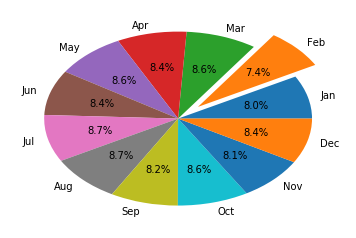

In [45]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',\
           10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_traffic = Flight_Data.month.value_counts(sort = False).reset_index().rename(columns= {'index':'month', \
                                                                                              'month':'no_of_flights'})  
monthly_traffic['Cal_Month'] = monthly_traffic['month'].apply(lambda x: look_up[x])

plt.pie(monthly_traffic.no_of_flights, labels = monthly_traffic.Cal_Month, explode = (0,0.2,0,0,0,0,0,0,0,0,0,0), \
        autopct = '%1.1f%%')

plt.show()

#### Inference:
1. Feb is the most lean month in terms of air traffic. Thus any maintenance etc can be planned in this month
2. Airtraffic is evenly distributed in the remaining months with 8-9 percent in each month

## What is the hourly traffic of flights?

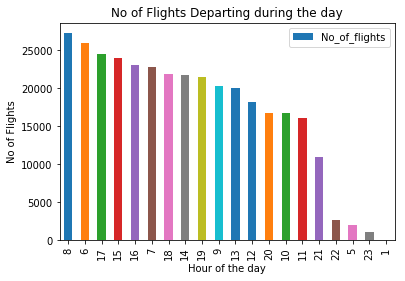

In [59]:
hourly_traffic = Flight_Data.hour.value_counts().reset_index().rename(columns={'index':'hour', 'hour': 'No_of_flights'})
plt.figure(figsize=(25,10))
ax = hourly_traffic.plot.bar(x = 'hour', y = 'No_of_flights', linewidth = 5)
ax.set(xlabel = 'Hour of the day', ylabel = 'No of Flights' , title = 'No of Flights Departing during the day')
plt.show()
#hourly_traffic

#### Inference
1. The peak time traffic is in the time zine 8:00-9:00, 6:00-7:00, 17:00-18:00, 15:00-16:00 and 16:00-17:00 region
2. There are no flights scheduled between 1:00-2:00<br>
3. Other lean period of the day are 23:00-24:00, 5:00-6:00 and 22:00-23:00. Any high priority maintenance can be planned in lean hours

## Which is the Best Airport for on-time departure?

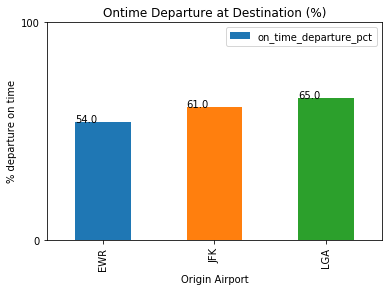

In [89]:
best_airports = Flight_Data.origin.value_counts().reset_index().rename(columns = {'index':'origin', 'origin':'total_flights'})
best_airports['on_time_departure'] = 0

for i in Flight_Data.origin.unique():
    ontime_departure = Flight_Data.loc[(Flight_Data.origin == i) & (Flight_Data.dep_delay <= 0)].origin.count()
    best_airports.loc[best_airports['origin'] == i, 'on_time_departure'] = ontime_departure
    
best_airports['on_time_departure_pct'] = round(best_airports['on_time_departure']/best_airports['total_flights'] * 100, 0)
ax = best_airports.plot.bar(x = 'origin', y = 'on_time_departure_pct', linewidth = 2,yticks = [0,100])
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
ax.set(xlabel = 'Origin Airport', ylabel = '% departure on time', title = 'Ontime Departure at Destination (%)')
plt.show()


#### Inference
1. LGA is the best ontime departure airport with a score of 65%

## Which are the best airports for on-time arrival of flights?
For this analysis, we shall consider only those airports where no of flights > 100. The reason being, there are airports which have less than 10 flights in a year. Thus we shall ignore airports that are very sparingly used

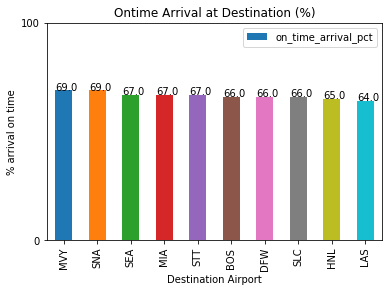

In [14]:
best_airports = Flight_Data.groupby(['dest']).size().reset_index().rename(columns={0:'total_flights'})
best_airports.index = best_airports.dest
best_airports['on_time_arrival'] = 0
for i in Flight_Data.dest.unique():
    ontime_arrival = Flight_Data.loc[(Flight_Data.dest == i) & (Flight_Data.arr_delay <= 0)].origin.count()
    best_airports.loc[i, 'on_time_arrival'] = ontime_arrival
best_airports['on_time_arrival_pct'] = round(best_airports['on_time_arrival']/best_airports['total_flights'] * 100, 0)


best_airports = best_airports.loc[best_airports.total_flights > 100].sort_values(by = 'on_time_arrival_pct', \
                                                                                 ascending = False).head(10)
ax = best_airports.plot.bar(x = 'dest', y = 'on_time_arrival_pct', linewidth = 2,yticks = [0,100])
ax.set(xlabel = 'Destination Airport', ylabel = '% arrival on time', title = 'Ontime Arrival at Destination (%)')
#for getting the values on each bar
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))
plt.show()

#### Inference
1. MVY and SNA leads from other airports in terms of on time arrival with a 69% on-time flights<br>
2. However, there is not significant gap between the next 5-6 airports(SEA, MIA, STT, BOS, DFW, SLC, HNL, LAS) which range between 64% to 67%

## Which route has the most amount of delay generally?

In [15]:
delayed_flights = Flight_Data.loc[Flight_Data.dep_delay > 0][['month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',\
                                                              'carrier', 'origin', 'dest', 'air_time', 'distance', 'flight_no']]
most_delayed_route = delayed_flights.groupby(['origin', 'dest']).size().reset_index().rename(columns={0:'No_of_delayed_flights'}).\
        sort_values('No_of_delayed_flights', ascending = False)
most_delayed_route['delay %'] = round(most_delayed_route['No_of_delayed_flights']/most_delayed_route['No_of_delayed_flights'].\
                                      sum() * 100, 2)
display('Most delayed routs are:')
most_delayed_route.head(10)


'Most delayed routs are:'

,origin,dest,No_of_delayed_flights,delay %
117,JFK,LAX,4150,3.04
156,LGA,ATL,3692,2.70
146,JFK,SFO,3120,2.28
203,LGA,ORD,3076,2.25
55,EWR,ORD,2789,2.04
74,EWR,SFO,2682,1.96
39,EWR,LAX,2428,1.78
7,EWR,BOS,2225,1.63
42,EWR,MCO,2194,1.61
92,JFK,BOS,2193,1.60


#### Inferences
1. JFK LAX sector has maximum number of delayed flights (4105) which account for 3.04% of all the flights that aredelayed
2. LGA ATL, JFK SFO, LGA ORD and EWR ORD, each of these sectors have very high number of delayed flights and each of them account for more than 2% of overall delayed flights

### Which flights are delayed by more than 30 minutes?

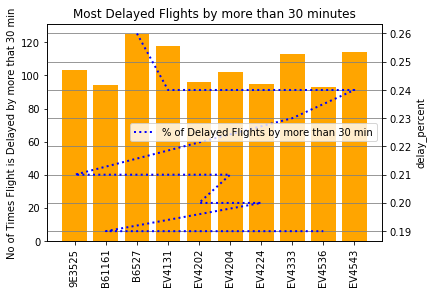

In [46]:
delayed_flights_30 = Flight_Data.loc[Flight_Data.dep_delay > 30][['month', 'day', 'dep_time', 'dep_delay', 'arr_time',\
                                                'arr_delay', 'carrier', 'origin', 'dest', 'air_time', 'distance', 'flight_no']]
delayed_flights_30 = delayed_flights_30.groupby(['flight_no']).size().reset_index().rename(columns={0:'No_of_delayed_flights'}).\
        sort_values('No_of_delayed_flights', ascending = False)
delayed_flights_30['delay_percent'] = round(delayed_flights_30['No_of_delayed_flights']/delayed_flights_30['No_of_delayed_flights'].\
                                      sum() * 100, 2)


plt.figure(figsize=(20,10))
plt.subplots_adjust()

fig, ax1 = plt.subplots()
plt.xticks()

#display(delayed_flights_30.flight_no.head(10), delayed_flights_30.No_of_delayed_flights.head(10).head(10))
curve1 = ax1.bar(delayed_flights_30.flight_no.head(10), delayed_flights_30.No_of_delayed_flights.head(10), \
         label = "No of Delayed Flights by more than 30 min", linewidth = 2, color = 'orange')
ax1.set_ylabel("No of Times Flight is Delayed by more that 30 min")

ax1.tick_params('x', rotation = 90)

ax2 = ax1.twinx()

curve2 = ax2.plot(delayed_flights_30.flight_no.head(10), delayed_flights_30.delay_percent.head(10), \
                  label = "% of Delayed Flights by more than 30 min", linestyle = 'dotted', linewidth = 2, color = 'b')
ax2.set_ylabel("delay_percent")


plt.title("Most Delayed Flights by more than 30 minutes")

plt.legend()
plt.grid(True, color='grey')
plt.show()

#### Inferences
1. Flight No B6527 has highest percentage of delays(>30 mins) followed by flight no EV4131

## On average how do delays of non-cancelled flights vary over day?

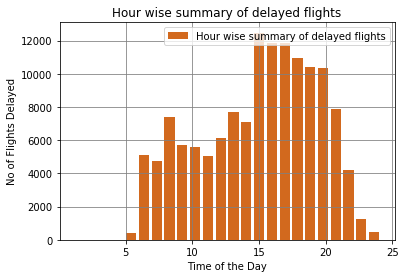

In [45]:
delayed_flights = Flight_Data.loc[Flight_Data.dep_delay > 0][['month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',\
                'carrier', 'origin', 'dest', 'air_time', 'distance', 'flight_no']].sort_values(['dep_time'], ascending = True)
ax = plt.hist(delayed_flights.dep_time/100, bins = 24, histtype='bar' , rwidth = 0.8, \
              label = "Hour wise summary of delayed flights",color ='chocolate')
plt.title('Hour wise summary of delayed flights')
plt.xlabel("Time of the Day")
plt.ylabel("No of Flights Delayed")
plt.legend()
plt.grid(True, color='grey')

plt.show()

#### Inferences
1. Maximum delayes happens between 3 pm to 6 pm
2. Evenings (6 pm to 9 pm) also have very high chances of flight delays 
3. Morning flights have relatively low departure delay